In [124]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [125]:
#import the file midterm_data from downloads
df = pd.read_csv(R'C:\Users\hanna\Downloads\midterm_data.csv')

In [126]:
#use head() function to quickly assess the data set
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


We can see several things by using the head() function:
- We have a numerical column describing the user ID associated to each person and another numerical column describing their age
- There is another numerical column called sessions, which is the session ID for each user
- We have a numerical time_spent column, which is the number of minutes they spent browsing, a numerical column pages_visited describing the number of pages they visited during their session, and another numerical column cart_items describing the number of items in their cart
- The next numerical column is cart_value, which lists the value of the items in each user's cart
- Checkout status lists a 1 if they did check out and a 0 if they did not
- Finally, there is a categorical column describing the device type and another categorical column describing the location of the user

In [127]:
#next use info() function to assess if there are structural issues
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


We can see several things using the info() function:
- There are 5000 entries
- Many of the columns do not have missing entries, with the exception of the device and location columns
- Device has (5000 - 4900) 100 missing entries, or about 2% missing data
- Location has (5000 - 4970) missing entries, or about 0.4% missing data
- These are relatively small amounts of missing data

In [128]:
#next, use the describe() function for some initial descriptive statistics
#include = all because there is categorical data
df.describe(include = 'all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


We can see several things using the describe() function:
- The mean age of users is 42 (rounded) which is the same as the median age of 42. This indicates a normal distribution
- The mean time spent (25) and median time spent (25) are the same, also indicating normal distribution
- Mean/median for pages visited and cart items are also about the same
- The mean cart value is $149.44 while the median is 143.44, which may indicate a minimal amount of skewness
- There are 3 unique device types and 5 unique locations
- The most common device type is a desktop and the most common location of users is location 4


Now that we have conducted an initial analysis of the data we are working with, we will proceed to clean the data:
- There are no data type issues, so these will not be changed
- There are only two columns with missing data: 'device' and 'location'
    - Since there are very small amounts of data missing, we may be able to drop these columns, or we can simply assign 'Other' to the missing values
    - The best approach will be determined by comparing a cleaned data frame to the original one to ensure the statistics do not change too drastically

In [129]:
# check if any rows are missing both device and location data
df[df['device'].isnull() & df['location'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
2130,2131,20,5,21.841304,6,19,243.39,0,NaN,NaN


Since there is only one column missing both data points, we will drop it as the data will not be affected too much

In [130]:
#drop the row 
df = df.drop(df[df['userID'] == 2131].index)

In [131]:
#check data statistics again
df.describe(include = 'all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.573915,41.542509,5.027205,25.159160,5.774355,14.965593,149.424353,0.272454,NaN,NaN
std,1443.654943,14.040833,2.595218,9.826407,2.571097,6.046672,68.705704,0.445267,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.500000,29.000000,3.000000,18.267083,4.000000,10.000000,92.465000,0.000000,NaN,NaN
50%,2501.000000,42.000000,5.000000,25.036202,6.000000,15.000000,143.340000,0.000000,NaN,NaN
75%,3750.500000,54.000000,7.000000,32.001153,8.000000,20.000000,198.330000,1.000000,NaN,NaN


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4999 non-null   int64  
 1   age              4999 non-null   int64  
 2   sessions         4999 non-null   int64  
 3   time_spent       4999 non-null   float64
 4   pages_visited    4999 non-null   int64  
 5   cart_items       4999 non-null   int64  
 6   cart_value       4999 non-null   float64
 7   checkout_status  4999 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.6+ KB


We can see that means, medians, and modes have not changed. We can also see that the data set has been reduced by one entry. 

Now we can check what would happen if we fill missing device and location data with 'Other'. First, we l make a copy of our data frame as we are only testing the output of this approach before making a final decision 

In [133]:
#use the copy() function to make a copy of the data frame
df_test = df.copy()

In [134]:
#get descriptive statistics by device using groupby()
df_test.groupby('device').describe()

userID                                                            
          count         mean          std  min      25%     50%      75%   
device                                                                     
Desktop  2538.0  2481.464933  1435.264432  1.0  1260.25  2497.5  3733.75  \
Mobile   1428.0  2518.448880  1457.420581  7.0  1236.75  2512.5  3807.75   
Tablet    934.0  2534.595289  1452.234322  5.0  1271.25  2513.0  3753.25   

                    age             ... cart_value         checkout_status   
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2538.0  41.338849  ...   197.2450  427.40          2538.0  \
Mobile   4991.0  1428.0  41.724790  ...   201.6100  387.98          1428.0   
Tablet   5000.0   934.0  41.844754  ...   197.7025  377.98           934.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.285264  0.451629  0.0  0.0  0.0  1.0  1.0  
Mobile   0.264706  0.441331  0.0  0.0  0.0  1.0  1.0  
Tablet   0.254818  0.435992  0.0  0.0  0.0  1.0  1.0  

[3 rows x 64 columns]

In [135]:
#fill in missing device data with 'Other' and compare statistics
df_test['device'] = df_test['device'].fillna('Other')

In [136]:
#compare data set with 'other' included
df_test.groupby('device').describe()

userID                                                             
          count         mean          std   min      25%     50%      75%   
device                                                                      
Desktop  2538.0  2481.464933  1435.264432   1.0  1260.25  2497.5  3733.75  \
Mobile   1428.0  2518.448880  1457.420581   7.0  1236.75  2512.5  3807.75   
Other      99.0  2411.656566  1386.399927  80.0  1226.00  2379.0  3541.50   
Tablet    934.0  2534.595289  1452.234322   5.0  1271.25  2513.0  3753.25   

                    age             ... cart_value         checkout_status   
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2538.0  41.338849  ...   197.2450  427.40          2538.0  \
Mobile   4991.0  1428.0  41.724790  ...   201.6100  387.98          1428.0   
Other    4988.0    99.0  41.282828  ...   191.7000  302.48            99.0   
Tablet   5000.0   934.0  41.844754  ...   197.7025  377.98           934.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.285264  0.451629  0.0  0.0  0.0  1.0  1.0  
Mobile   0.264706  0.441331  0.0  0.0  0.0  1.0  1.0  
Other    0.222222  0.417855  0.0  0.0  0.0  0.0  1.0  
Tablet   0.254818  0.435992  0.0  0.0  0.0  1.0  1.0  

[4 rows x 64 columns]

This does not seem to be creating too much bias in the data as the means, medians, modes, etc. appear to be similar to the other device types

In [137]:
#get descriptive statistics by location using groupby()
df_test.groupby('location').describe()

userID                                                           
             count         mean          std  min      25%     50%     75%   
location                                                                     
Location 1   979.0  2428.888662  1460.439111  1.0  1115.00  2431.0  3683.5  \
Location 2   950.0  2495.070526  1413.792983  4.0  1335.50  2517.0  3674.0   
Location 3  1014.0  2477.388560  1437.144060  2.0  1248.25  2378.5  3712.5   
Location 4  1056.0  2508.631629  1470.328379  3.0  1219.50  2517.5  3796.0   
Location 5   971.0  2598.049434  1434.875326  6.0  1352.50  2664.0  3849.0   

                       age             ... cart_value         checkout_status   
               max   count       mean  ...        75%     max           count   
location                               ...                                      
Location 1  4995.0   979.0  42.291113  ...   199.9500  394.77           979.0  \
Location 2  4997.0   950.0  41.648421  ...   198.9475  357.77           950.0   
Location 3  5000.0  1014.0  41.763314  ...   195.4400  427.40          1014.0   
Location 4  4998.0  1056.0  40.892992  ...   199.5425  353.80          1056.0   
Location 5  4999.0   971.0  41.085479  ...   197.7800  359.00           971.0   

                                                         
                mean       std  min  25%  50%  75%  max  
location                                                 
Location 1  0.282942  0.450659  0.0  0.0  0.0  1.0  1.0  
Location 2  0.266316  0.442264  0.0  0.0  0.0  1.0  1.0  
Location 3  0.261341  0.439582  0.0  0.0  0.0  1.0  1.0  
Location 4  0.284091  0.451194  0.0  0.0  0.0  1.0  1.0  
Location 5  0.266735  0.442481  0.0  0.0  0.0  1.0  1.0  

[5 rows x 64 columns]

In [138]:
#fill in missing device data with 'Other' and compare statistics
df_test['location'] = df_test['location'].fillna('Other')

In [139]:
#compare data set with 'other' included
df_test.groupby('location').describe()

userID                                                            
             count         mean          std   min      25%     50%     75%   
location                                                                      
Location 1   979.0  2428.888662  1460.439111   1.0  1115.00  2431.0  3683.5  \
Location 2   950.0  2495.070526  1413.792983   4.0  1335.50  2517.0  3674.0   
Location 3  1014.0  2477.388560  1437.144060   2.0  1248.25  2378.5  3712.5   
Location 4  1056.0  2508.631629  1470.328379   3.0  1219.50  2517.5  3796.0   
Location 5   971.0  2598.049434  1434.875326   6.0  1352.50  2664.0  3849.0   
Other         29.0  2354.379310  1310.371523  60.0  1460.00  2352.0  3325.0   

                       age             ... cart_value         checkout_status   
               max   count       mean  ...        75%     max           count   
location                               ...                                      
Location 1  4995.0   979.0  42.291113  ...   199.9500  394.77           979.0  \
Location 2  4997.0   950.0  41.648421  ...   198.9475  357.77           950.0   
Location 3  5000.0  1014.0  41.763314  ...   195.4400  427.40          1014.0   
Location 4  4998.0  1056.0  40.892992  ...   199.5425  353.80          1056.0   
Location 5  4999.0   971.0  41.085479  ...   197.7800  359.00           971.0   
Other       4951.0    29.0  44.034483  ...   195.4400  237.64            29.0   

                                                         
                mean       std  min  25%  50%  75%  max  
location                                                 
Location 1  0.282942  0.450659  0.0  0.0  0.0  1.0  1.0  
Location 2  0.266316  0.442264  0.0  0.0  0.0  1.0  1.0  
Location 3  0.261341  0.439582  0.0  0.0  0.0  1.0  1.0  
Location 4  0.284091  0.451194  0.0  0.0  0.0  1.0  1.0  
Location 5  0.266735  0.442481  0.0  0.0  0.0  1.0  1.0  
Other       0.275862  0.454859  0.0  0.0  0.0  1.0  1.0  

[6 rows x 64 columns]

This does not seem to be creating too much bias in the data as the means, medians, modes, etc. appear to be similar to the other device types

Since using 'other' to fill in missing data in the location and device columns does not seem to create too much bias, we will proceed with this approach and apply it to the original data set

In [140]:
#fill in missing device values
df['device'] = df['device'].fillna('Other')


In [141]:
#fill in missing location values
df['location'] = df['location'].fillna('Other')

In [142]:
df

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
...,...,...,...,...,...,...,...,...,...,...
4995,4996,48,8,45.000000,11,25,278.92,0,Tablet,Location 5
4996,4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2
4997,4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4
4998,4999,58,1,45.000000,11,24,203.42,0,Desktop,Location 5


Let's check for outliers using box plots, We will only do this for some columns such as time spent and cart value

<Axes: ylabel='time_spent'>

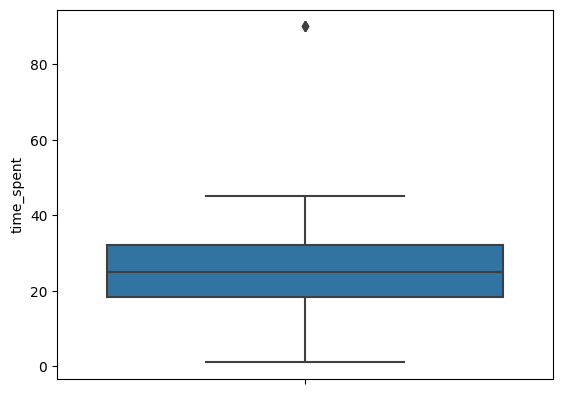

In [143]:
#check for outliers in time_spent
sns.boxplot(data = df, y='time_spent')

In [144]:
#drop the outliers since there do not appear to be many
df.drop(df[df['time_spent'] > 80].index, axis = 0, inplace = True)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4995 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4995 non-null   int64  
 1   age              4995 non-null   int64  
 2   sessions         4995 non-null   int64  
 3   time_spent       4995 non-null   float64
 4   pages_visited    4995 non-null   int64  
 5   cart_items       4995 non-null   int64  
 6   cart_value       4995 non-null   float64
 7   checkout_status  4995 non-null   int64  
 8   device           4995 non-null   object 
 9   location         4995 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.3+ KB


It appears that there were 4 outliers where time spent was above 90 minutes. This is a minimal amount and will not have a large effect on the data.

<Axes: ylabel='cart_value'>

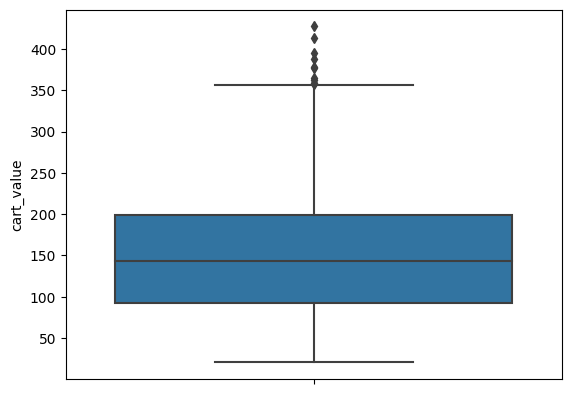

In [146]:
sns.boxplot(data = df, y='cart_value')

Although there are also outliers here, I want to keep them to analyze relationships such as if a higher cart value = more or less likely to check out

In [147]:
#lastly, drop duplicates
df.drop_duplicates(inplace=True)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4995 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4995 non-null   int64  
 1   age              4995 non-null   int64  
 2   sessions         4995 non-null   int64  
 3   time_spent       4995 non-null   float64
 4   pages_visited    4995 non-null   int64  
 5   cart_items       4995 non-null   int64  
 6   cart_value       4995 non-null   float64
 7   checkout_status  4995 non-null   int64  
 8   device           4995 non-null   object 
 9   location         4995 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.3+ KB


We are now done with data cleaning and left with 4995 entries. Next, we will begin analyzing the relationships of those who check out or do not check out with other factors.

<Axes: xlabel='time_spent', ylabel='Count'>

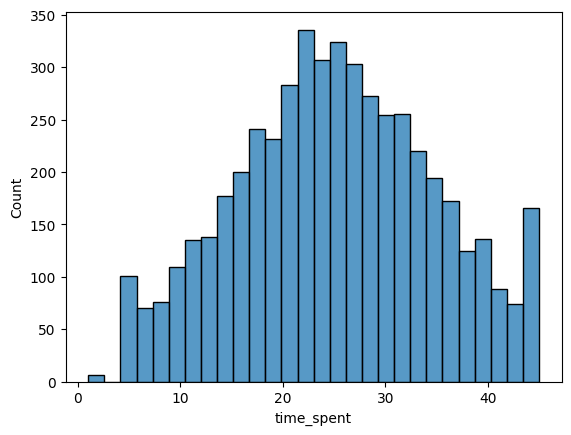

In [149]:
#create histogram to see the age of users
sns.histplot(df['time_spent'])

Users seem to most commonly spend between 20-30 minuted browsing per session.

<Axes: xlabel='checkout_status', ylabel='Count'>

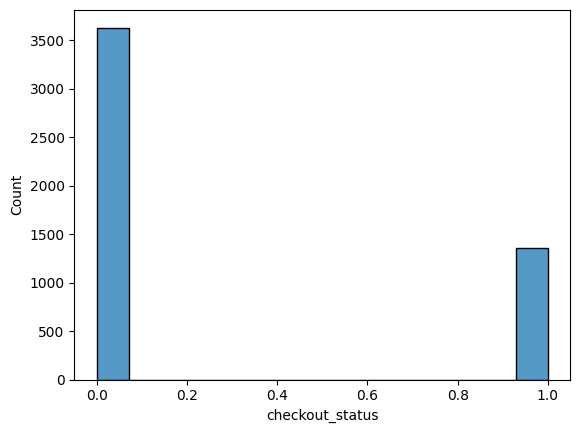

In [150]:
#create histogram to see how many users check out/ do not check out
sns.histplot(df['checkout_status'])

It is clear that most users do not end up checking-out.

In [151]:
#next, check location vs. check out status
location_vs_checkout = pd.crosstab(df['checkout_status'], df['location'])
print(location_vs_checkout)

location         Location 1  Location 2  Location 3  Location 4  Location 5   
checkout_status                                                               
0                       700         697         749         754         712  \
1                       277         253         265         300         259   

location         Other  
checkout_status         
0                   21  
1                    8  


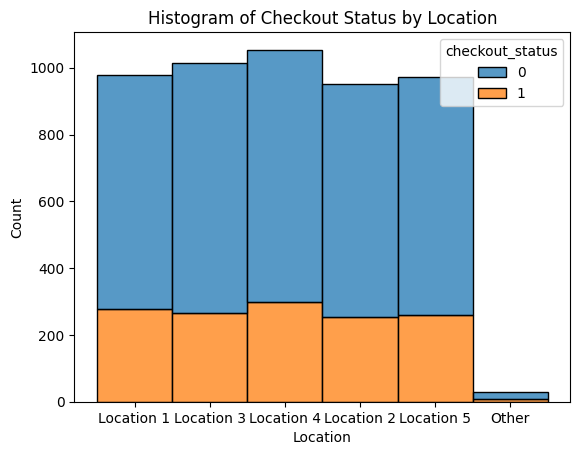

In [152]:
sns.histplot(data=df, x='location', hue='checkout_status', multiple='stack')

# Set the title and labels
plt.title('Histogram of Checkout Status by Location')
plt.xlabel('Location')
plt.ylabel('Count')

# Show the histogram
plt.show()

In [153]:
#next, check device vs. check out status
device_vs_checkout = pd.crosstab(df['checkout_status'], df['device'])
print(device_vs_checkout)

device           Desktop  Mobile  Other  Tablet
checkout_status                                
0                   1810    1050     77     696
1                    724     378     22     238


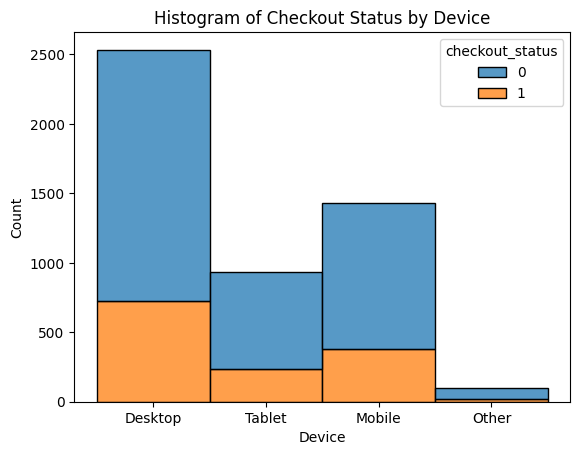

In [154]:
sns.histplot(data=df, x='device', hue='checkout_status', multiple='stack')

# Set the title and labels
plt.title('Histogram of Checkout Status by Device')
plt.xlabel('Device')
plt.ylabel('Count')

# Show the histogram
plt.show()

In [155]:
# Create function to classify cart_value amounts
def total_cat(x):
    if x >= 0 and x < 100:
        return '0-100'
    elif x >= 100 and x < 150:
        return '100-150'
    elif x >= 150 and x < 200:
        return '150-200'
    elif x >= 200 and x < 250:
        return '200-250'
    elif x >= 250 and x < 300:
        return '250-300'
    elif x >= 300 and x < 350:
        return '300-350'
    else:
        return '400+'

In [156]:
#create new column with cart value range using total_cat() function created above
df['cart_value_group'] = df['cart_value'].apply(total_cat)

In [157]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location,cart_value_group
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1,150-200
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3,250-300
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4,200-250
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2,150-200
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4,0-100


In [158]:
#next, check cart value groups vs. check out status
cartvalue_vs_checkout = pd.crosstab(df['checkout_status'], df['cart_value_group'])
print(cartvalue_vs_checkout)

cart_value_group  0-100  100-150  150-200  200-250  250-300  300-350  400+
checkout_status                                                           
0                  1133      724      723      651      306       82    14
1                   321      477      403      136       23        2     0


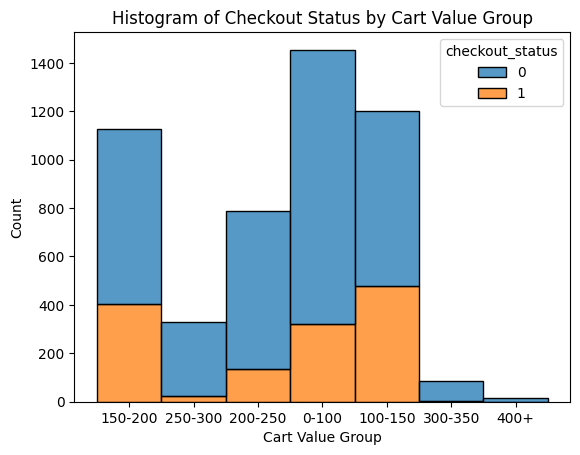

In [159]:
sns.histplot(data=df, x='cart_value_group', hue='checkout_status', multiple='stack')

# Set the title and labels
plt.title('Histogram of Checkout Status by Cart Value Group')
plt.xlabel('Cart Value Group')
plt.ylabel('Count')

# Show the histogram
plt.show()

In [160]:
#create function to classify time_spent amounts
def total_cat2(x):
    if x >= 0 and x < 10:
        return '0-10'
    elif x >= 10 and x < 20:
        return '10-20'
    elif x >= 20 and x < 30:
        return '20-30'
    elif x >= 30 and x < 40:
        return '30-40'
    elif x >= 40 and x < 50:
        return '40-50'
    elif x >= 50 and x < 60:
        return '50-60'
    else:
        return '60+'

In [161]:
#create new column with time spent range using total_cat2() function created above
df['time_spent_group'] = df['time_spent'].apply(total_cat2)

In [162]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location,cart_value_group,time_spent_group
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1,150-200,10-20
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3,250-300,20-30
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4,200-250,10-20
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2,150-200,20-30
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4,0-100,20-30


In [163]:
#next, check time spent groups vs. check out status
timespent_vs_checkout = pd.crosstab(df['checkout_status'], df['time_spent_group'])
print(timespent_vs_checkout)

time_spent_group  0-10  10-20  20-30  30-40  40-50
checkout_status                                   
0                  326   1185   1318    457    347
1                    0      0    580    782      0


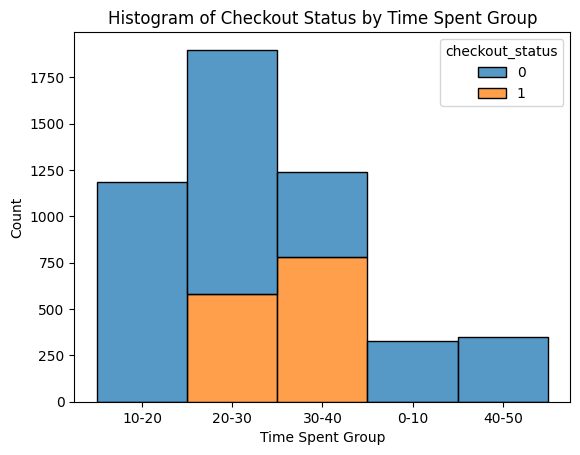

In [164]:
sns.histplot(data=df, x='time_spent_group', hue='checkout_status', multiple='stack')

# Set the title and labels
plt.title('Histogram of Checkout Status by Time Spent Group')
plt.xlabel('Time Spent Group')
plt.ylabel('Count')

# Show the histogram
plt.show()

In [165]:
#create function to classify cart_items amounts
def total_cat3(x):
    if x >= 0 and x < 5:
        return '0-5'
    elif x >= 5 and x < 10:
        return '5-10'
    elif x >= 10 and x < 15:
        return '10-15'
    elif x >= 15 and x < 20:
        return '15-20'
    elif x >= 20 and x < 25:
        return '20-25'
    elif x >= 25 and x < 30:
        return '25-30'
    else:
        return '30+'

In [166]:
#create new column with time spent range using total_cat3() function created above
df['cart_items_group'] = df['cart_items'].apply(total_cat3)

In [167]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location,cart_value_group,time_spent_group,cart_items_group
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1,150-200,10-20,20-25
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3,250-300,20-30,20-25
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4,200-250,10-20,20-25
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2,150-200,20-30,15-20
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4,0-100,20-30,10-15


In [168]:
#next, check cart items groups vs. check out status
cartitems_vs_checkout = pd.crosstab(df['checkout_status'], df['cart_items_group'])
print(cartitems_vs_checkout)

cart_items_group  10-15  15-20  20-25  25-30  5-10
checkout_status                                   
0                   677    645   1071    243   997
1                   522    529    112      0   199


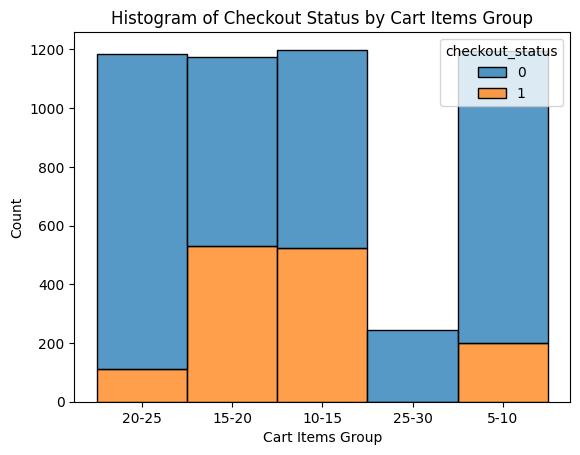

In [169]:
sns.histplot(data=df, x='cart_items_group', hue='checkout_status', multiple='stack')

# Set the title and labels
plt.title('Histogram of Checkout Status by Cart Items Group')
plt.xlabel('Cart Items Group')
plt.ylabel('Count')

# Show the histogram
plt.show()

Question One

Based on my analysis, I can make the following conclusions about the behaviour of users that check-out v.s. users who do not check-out:
- Users seem to most commonly spend between 20-30 minuted browsing per session
- Most sessions do not result in the user checking out
- Location:
    - About 28% of users in location 1 decided to check-out
    - About 27% of users in location 2 decided to check-out
    - About 26% of users in location 3 decided to check-out
    - About 27% of users in location 4 decided to check-out
    - About 2% of users in location 5 decided to check-out
    - About 28% of users in 'other' location decided to check-out
    - Therefore, the location of the users does not seem to have a major impact on whether they check-out or not
- Device:
    - About 29% of users using a desktop device check-out
    - About 26% of users using a mobile device check-out
    - About 25% of users using a tablet device check-out
    - About 22% of users using a device assigned 'other' checked-out
    - Therefore, it does not appear that device type has a big impact on whether a user decides to check-out or not
- Cart Value
    - Users with a cart value of over $250 almost never check-out
    - Users with a cart value between $0-$100 check-out 22% of the time
    - Users with a cart value between $100-$150 check-out 40% of the time
    - Users with a cart value between $150-$200 check-out 36% of the time
    - Users with a cart value between $200-$250 check-out 18% of the time
    - Therefore, users with a cart value between $100 to $200 check-out the most frequently
- Time Spent:
    - Users only check-out when they have spent between 20-40 minutes browsing. Any time that is higher or lower does not result in a purchase
    - Users who spent between 20-30 minutes checked-out 31% of the time
    - Users who spent between 30-40 minutes checked-out 63% of the time
- Cart Items
    - It is clear the users check out most often when the total number of items in their cart ranges from 10-20 items
    - Users with 10-15 items in their cart decided to check-out 44% of the time
    - Users with 15-20 items in their cart decided to check-out 45% of the time

Question Two

I took a relatively simple data cleaning approach as the data set was fairly complete when it was received:
- First, I dropped the row that was missing both device and location data as I knew that I wanted to use these for analysis in the future
- Next,I decided to fill in the missing device and location values with 'other'
    - Although there were other possible approaches to filling the data mentioned, this approach was chosen due to its time-saving qualities and because this approach did not appear to create any significant bias in the data
    - I also did not want to delete all of the rows that were missing just one value in one column as they can offer valuable insights in other areas that were analyzed, such as time spent and cart value
- Once the values were filled, I checked for outliers
    - I only decided to check for outliers in specific columns that I felt were the most important
    - I dropped 4 outliers in the time_spent column as there were not many and I did not feel they were important for analysis
    - Although there were outliers in the cart_value column, there were far more of them. I decided to keep these in order to further analyze the relationship between high spending and liklihood of check-out
- In my analysis, I further simplified the data by creating different groups in columns such as cart value, time spent, and items in cart
    - I felt that creating groups in these columns made it much easier to visualize and analyze check-out habits between users

Question Three

- Target Users with Cart Value between $100 and $200:
    - Focus on attracting and engaging users who have a cart value within the range of $100 and $200
    - Provide special offers, discounts, or incentives specifically for this group of users to encourage them to check out
    - Consider showcasing products within this price range prominently on the website or through personalized recommendations

- Target Users Spending between 20-40 Minutes Browsing:
    - Pay attention to users who spend between 20-40 minutes browsing the website
    - Enhance the user experience during this time frame by ensuring seamless navigation, quick loading times, and relevant product suggestions
    - Implement features such as saved shopping carts, personalized recommendations, or reminders for users who have been browsing for a while but haven't checked out yet

- Target Users with 10-20 Items in Their Cart:
    - Identify and engage users who have a cart containing between 10-20 items
    - Provide tailored incentives, such as bundle discounts or free shipping, to encourage these users to complete their purchases
    - Streamline the checkout process, making it simple and intuitive for users with larger cart sizes to finalize their orders
    

- In addition to the above recommendations, consider implementing data tracking and analysis to monitor the effectiveness of these strategies. By continuously analyzing user behavior, preferences, and conversion rates, you can further refine and optimize the product offerings and marketing strategies to maximize conversions and customer satisfaction.